In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from numpy import array
from scipy.sparse import csr_matrix


In [2]:
svm_df = pd.read_csv('data/final_fraud_dataset.csv')

cols = svm_df.columns.tolist()
cat_preds_fields = cols[1:2]+cols[4:9]+cols[11:22]+cols[27:28]+cols[31:32]+cols[33:36]+cols[37:38]+cols[39:55]
num_preds_fields = cols[9:11]+cols[22:26]+cols[32:33]+cols[71:72]+cols[73:81]
non_preds_fields = cols[1:4]+ cols[26:27]+cols[28:32]+cols[33:37]+cols[38:39]+cols[55:71]

svm_df[cat_preds_fields]  = svm_df[cat_preds_fields].astype('category')
reorder_cols = non_preds_fields+num_preds_fields + cat_preds_fields
svm_preds_df = svm_df[reorder_cols]
svm_preds_df = svm_preds_df.drop(non_preds_fields, axis=1)

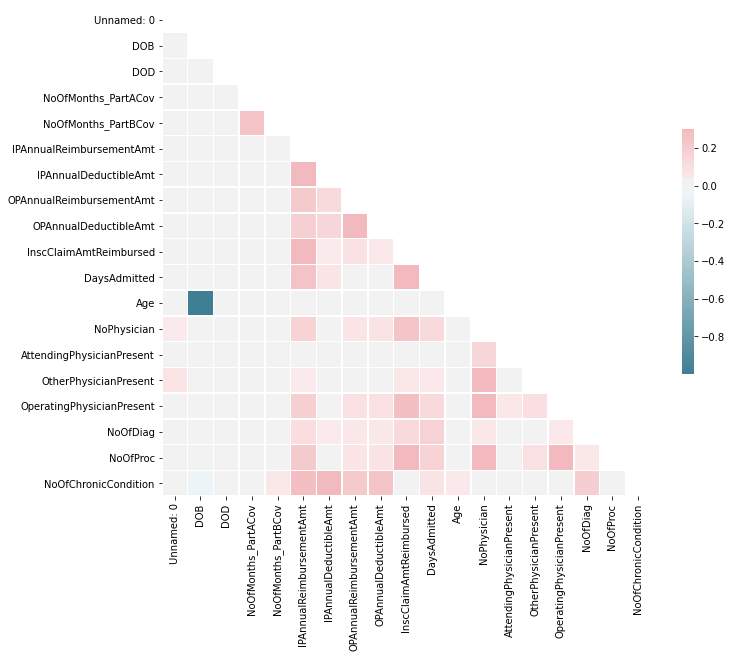

In [3]:
corr = svm_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


